In [75]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from riskslim import RiskSLIMClassifier


# Load features
df = pd.read_csv("alzheimers_features.csv")
df = df.loc[(df["label"] == "C") | (df["label"] == "A")]

# X and y
X = df.iloc[:, 1:].to_numpy()

y = np.zeros(len(X), dtype=int)
y[df["label"] == 'A'] = 1 # alzheimer's
y[df["label"] == 'C'] = 0 # controls

variable_names = list(df.columns[1:])

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Impute missing values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

# Scale up and round round to ints
# X_round = X_imp#(X_imp * 10).round(0)

# keep = ~np.all(X_round == X_round[0], axis=0)

# X_keep = X_round[:, keep]
# variable_names = np.array(variable_names)[keep].tolist()


keep = []

for i, v in enumerate(variable_names):
    if ("offset" not in v) and ("const" not in v) and ("exp" not in v):
        keep.append(i)
        
X_keep = X_imp[:, keep]
variable_names = np.array(variable_names)[keep].tolist()




settings = {
    # LCPA Settings
    # -------------
    # max runtime for LCPA
    "max_runtime": 30.0,
    # tolerance to stop LCPA (set to 0 to return provably optimal solution)
    "max_tolerance": np.finfo("float").eps,
    # how to compute the loss function ("normal","fast","lookup")
    "loss_computation": "fast",

    # LCPA Improvements
    # -----------------
    # round continuous solutions with SeqRd
    "round_flag": True,
    # polish integer feasible solutions with DCD
    "polish_flag": True,
    # use chained updates
    "chained_updates_flag": True,
    # add cuts at integer feasible solutions found using polishing/rounding
    "add_cuts_at_heuristic_solutions": True,

    # Initialization
    # --------------
    # use initialization procedure
    "initialization_flag": True,
    # max time to run CPA in initialization procedure
    "init_max_runtime": 120.0,
    "init_max_coefficient_gap": 0.9,

    # CPLEX Solver Parameters
    # -----------------------
    # random seed
    "cplex_randomseed": 0,
    # cplex MIP strategy
    "cplex_mipemphasis": 0,
}

In [76]:
# Initialize model
rs = RiskSLIMClassifier(
    max_size=5, # max model size (number of non-zero coefficients)
    max_coef=6, # value of largest/smallest coefficient.
    max_abs_offset=10,
    variable_names=variable_names,
    outcome_name="alzheimers",
    verbose=True,
    settings=settings
)

# Fit
rs.fit(X_keep, y)

/Users/ryanhammonds/projects/risk-slim/riskslim/coefficient_set.py:238: UserWarning:

setting c0_value = 0.0 for (Intercept) to ensure that intercept is not penalized



06/09/23 @ 04:34 PM | cuts = 1 	 UB = 5.5385 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 04:34 PM | cuts = 2 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 04:34 PM | cuts = 3 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 04:34 PM | cuts = 4 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 5 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 6 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 7 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 8 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 9 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 10 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 11 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 12 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 04:34 PM | cuts = 13 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99

06/09/23 @ 04:34 PM | cuts = 107 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 108 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 109 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 110 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 111 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 112 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 113 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 114 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 115 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 116 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 117 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 118 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 04:34 PM | cuts = 119 	 UB = 0.2533 	 LB 

06/09/23 @ 04:34 PM | cuts = 211 	 UB = 0.1665 	 LB = 0.0391 	 GAP = 76.4996%

06/09/23 @ 04:34 PM | cuts = 212 	 UB = 0.1665 	 LB = 0.0395 	 GAP = 76.2990%

06/09/23 @ 04:34 PM | cuts = 213 	 UB = 0.1646 	 LB = 0.0397 	 GAP = 75.8770%

06/09/23 @ 04:34 PM | cuts = 214 	 UB = 0.1646 	 LB = 0.0407 	 GAP = 75.3067%

06/09/23 @ 04:34 PM | cuts = 215 	 UB = 0.1646 	 LB = 0.0423 	 GAP = 74.3254%

06/09/23 @ 04:34 PM | cuts = 216 	 UB = 0.1646 	 LB = 0.0433 	 GAP = 73.6909%

06/09/23 @ 04:34 PM | cuts = 217 	 UB = 0.1646 	 LB = 0.0454 	 GAP = 72.4327%

06/09/23 @ 04:34 PM | cuts = 218 	 UB = 0.1646 	 LB = 0.0471 	 GAP = 71.3727%

06/09/23 @ 04:34 PM | cuts = 219 	 UB = 0.1646 	 LB = 0.0476 	 GAP = 71.1056%

06/09/23 @ 04:34 PM | cuts = 220 	 UB = 0.1646 	 LB = 0.0495 	 GAP = 69.9073%

06/09/23 @ 04:34 PM | cuts = 221 	 UB = 0.1646 	 LB = 0.0517 	 GAP = 68.6163%

06/09/23 @ 04:34 PM | cuts = 222 	 UB = 0.1646 	 LB = 0.0520 	 GAP = 68.4361%

06/09/23 @ 04:34 PM | cuts = 223 	 UB = 0.1646 	 LB 


06/09/23 @ 04:34 PM | cuts = 315 	 UB = 0.1359 	 LB = 0.0951 	 GAP = 30.0210%

06/09/23 @ 04:34 PM | cuts = 316 	 UB = 0.1359 	 LB = 0.0954 	 GAP = 29.8255%

06/09/23 @ 04:34 PM | cuts = 317 	 UB = 0.1359 	 LB = 0.0955 	 GAP = 29.7257%

06/09/23 @ 04:34 PM | cuts = 318 	 UB = 0.1359 	 LB = 0.0959 	 GAP = 29.4568%

06/09/23 @ 04:34 PM | cuts = 319 	 UB = 0.1359 	 LB = 0.0960 	 GAP = 29.3692%

06/09/23 @ 04:34 PM | cuts = 320 	 UB = 0.1359 	 LB = 0.0961 	 GAP = 29.2819%

06/09/23 @ 04:34 PM | cuts = 321 	 UB = 0.1359 	 LB = 0.0964 	 GAP = 29.1093%

06/09/23 @ 04:34 PM | cuts = 322 	 UB = 0.1359 	 LB = 0.0965 	 GAP = 29.0348%

06/09/23 @ 04:34 PM | cuts = 323 	 UB = 0.1359 	 LB = 0.0966 	 GAP = 28.9193%

06/09/23 @ 04:34 PM | cuts = 324 	 UB = 0.1359 	 LB = 0.0967 	 GAP = 28.8565%

06/09/23 @ 04:34 PM | cuts = 325 	 UB = 0.1359 	 LB = 0.0968 	 GAP = 28.7795%

06/09/23 @ 04:34 PM | cuts = 326 	 UB = 0.1338 	 LB = 0.0969 	 GAP = 27.6278%

06/09/23 @ 04:34 PM | cuts = 327 	 UB = 0.1338 	 LB


06/09/23 @ 04:34 PM | cuts = 419 	 UB = 0.1241 	 LB = 0.1107 	 GAP = 10.8377%

06/09/23 @ 04:34 PM | cuts = 420 	 UB = 0.1241 	 LB = 0.1109 	 GAP = 10.7089%

06/09/23 @ 04:34 PM | cuts = 421 	 UB = 0.1241 	 LB = 0.1109 	 GAP = 10.6513%

06/09/23 @ 04:34 PM | cuts = 422 	 UB = 0.1241 	 LB = 0.1110 	 GAP = 10.5774%

06/09/23 @ 04:34 PM | cuts = 423 	 UB = 0.1241 	 LB = 0.1111 	 GAP = 10.5290%

06/09/23 @ 04:34 PM | cuts = 424 	 UB = 0.1241 	 LB = 0.1111 	 GAP = 10.4877%

06/09/23 @ 04:34 PM | cuts = 425 	 UB = 0.1241 	 LB = 0.1112 	 GAP = 10.4566%

06/09/23 @ 04:34 PM | cuts = 426 	 UB = 0.1241 	 LB = 0.1112 	 GAP = 10.3945%

06/09/23 @ 04:34 PM | cuts = 427 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2882%

06/09/23 @ 04:34 PM | cuts = 428 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2582%

06/09/23 @ 04:34 PM | cuts = 429 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2352%

06/09/23 @ 04:34 PM | cuts = 430 	 UB = 0.1241 	 LB = 0.1115 	 GAP = 10.2120%

06/09/23 @ 04:34 PM | cuts = 431 	 UB = 0.1241 	 LB

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 04:34 PM | adding 490 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.1147    53                      0.000

  19050 13130        0.3525    12        0.4133        0.1546   226127   62.58%          rho_21 D  19050  19049     68
  19504 13432        0.1937    29        0.4133        0.1549   231395   62.51%        alpha_14 U  19504  19502     23
Elapsed time = 12.50 sec. (40719.37 ticks, tree = 5.32 MB, solutions = 13)
  19930 13708        0.4013    15        0.4133        0.1551   236563   62.48%        alpha_34 N  19930  19929     36
  20387 13990        0.3028    12        0.4133        0.1555   241435   62.38%        alpha_26 D  20387  20385     44
  20871 14279        0.3973    14        0.4133        0.1557   245939   62.33%           rho_9 U  20871  20870     48
  21324 14572        0.3131    11        0.4133        0.1561   250713   62.24%          rho_17 U  21324  21323     63
  21784 14849        0.2236    21        0.4133        0.1562   255775   62.20%          rho_55 U  21784  21783     19
  22228 15143        0.2530    18        0.4133        0.1564   260501   62.16%          rho

In [108]:
rs.create_report("report_alzheimers.html")

PosixPath('report_alzheimers.html')

In [54]:
rs.optimizer.solution_info

{'c0_value': 1e-06,
 'solution': array([ 1.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  5.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.,  0., -2.,  0.]),
 'objective_value': 0.44672629994038227,
 'loss_value': 0.44672029994038226,
 'optimality_gap': 0.7066949033333302,
 'run_time': 20.006244897842407,
 'solver_time': 19.199193716049194,
 'callback_time': 0.8070511817932129,
 'data_time': 0.024406909942626953,
 'nodes_processed': 19655}

In [106]:
from sklearn import metrics

metrics.auc(rs.reporter.fpr, rs.reporter.tpr)

0.8917624521072797

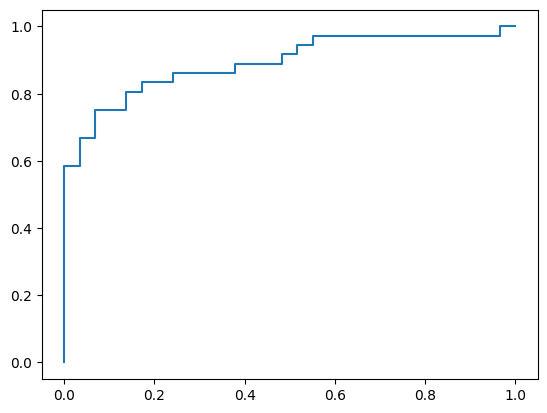

In [107]:
import matplotlib.pyplot as plt

plt.plot(rs.reporter.fpr, rs.reporter.tpr)